In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score , recall_score,precision_score ,roc_auc_score , classification_report
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV,StratifiedKFold ,cross_val_score


In [2]:
data = pd.read_csv('../Data/raw_data/churn_data.csv')
data.shape

(7043, 21)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [6]:
data_copy = data

In [7]:
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
1505.45     1
299.3       1
2221.55     1
389.6       1
3529.95     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
data.shape

(7043, 21)

In [9]:
## changing datatypes
data = data[data['TotalCharges']!=' ']
data.loc[:, 'TotalCharges'] = data.loc[:, 'TotalCharges'].astype(float)

data.loc[:,'SeniorCitizen'] = ['Yes' if i == 1 else 'No' for i in data.loc[:,'SeniorCitizen']]



/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<AxesSubplot:>

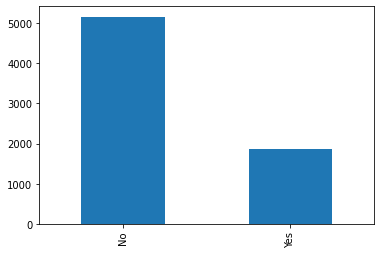

In [11]:
data['Churn'].value_counts().plot(kind='bar')

In [12]:
data['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


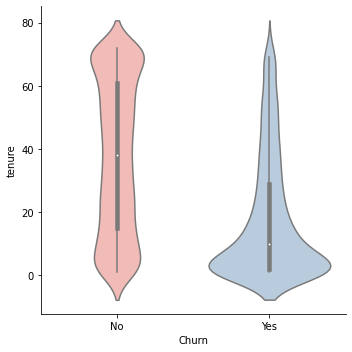

In [13]:
g = sns.factorplot(x="Churn", y = "tenure",data = data, kind="violin", palette = "Pastel1")

/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


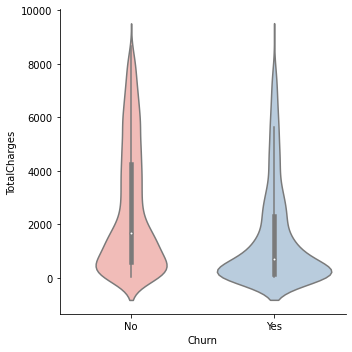

In [14]:
g = sns.factorplot(x="Churn", y = "TotalCharges",data = data, kind="violin", palette = "Pastel1")

/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


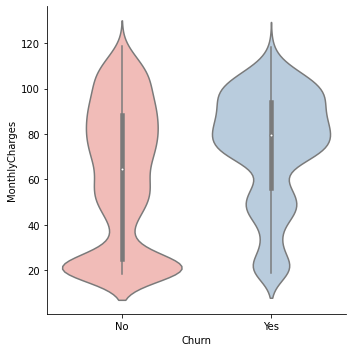

In [15]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="violin", palette = "Pastel1")

In [16]:
def summary_of_numerical_columns(data):
    num_cols = data.select_dtypes(include=np.number).columns.to_list()
    n_rows = len(num_cols)
    n_cols = 2

    fig,axis = plt.subplots(n_rows,n_cols,figsize = (10,10))

    for i in range(n_rows):
        sns.histplot(data = data,x= num_cols[i],kde=True,ax=axis[i][0])
        sns.boxplot(data=data,y=num_cols[i],ax=axis[i][1])

    plt.tight_layout()
    plt.show()
        
    

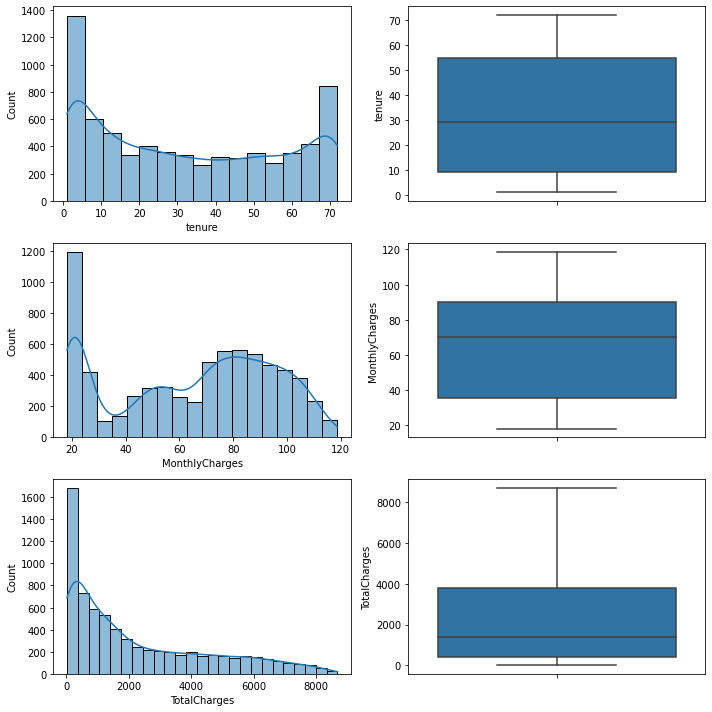

In [17]:
summary_of_numerical_columns(data=data)

In [18]:
cat_cols = data.select_dtypes(include='object').columns.to_list()
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

<AxesSubplot:xlabel='Churn', ylabel='count'>

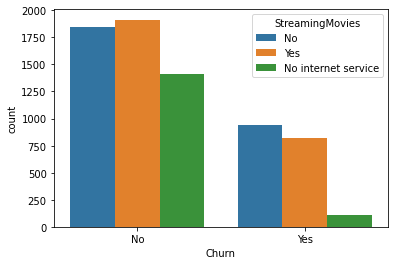

In [19]:
sns.countplot(data=data, x='Churn', hue='StreamingMovies')

In [20]:
excluded_columns = ['customerID','Churn']
target_column = 'Churn'

def summary_of_categorical_columns(data, target_column ,excluded_columns = None):
    cat_cols = data.select_dtypes(include='object').columns.to_list()
    if excluded_columns:
        for i in excluded_columns:
            if i in cat_cols:
                cat_cols.remove(i)

    
    n_cols = 3
    n_rows = (len(cat_cols)//n_cols)+1
    

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    axes_flat = axes.flatten()
    print(len(axes_flat))

    for i, ax in enumerate(axes_flat):
        if i < len(cat_cols):  
            sns.countplot(data=data, x=target_column, hue=cat_cols[i], ax=ax)
        else:
            ax.set_visible(False)  
    plt.tight_layout()
    
    plt.show()

18


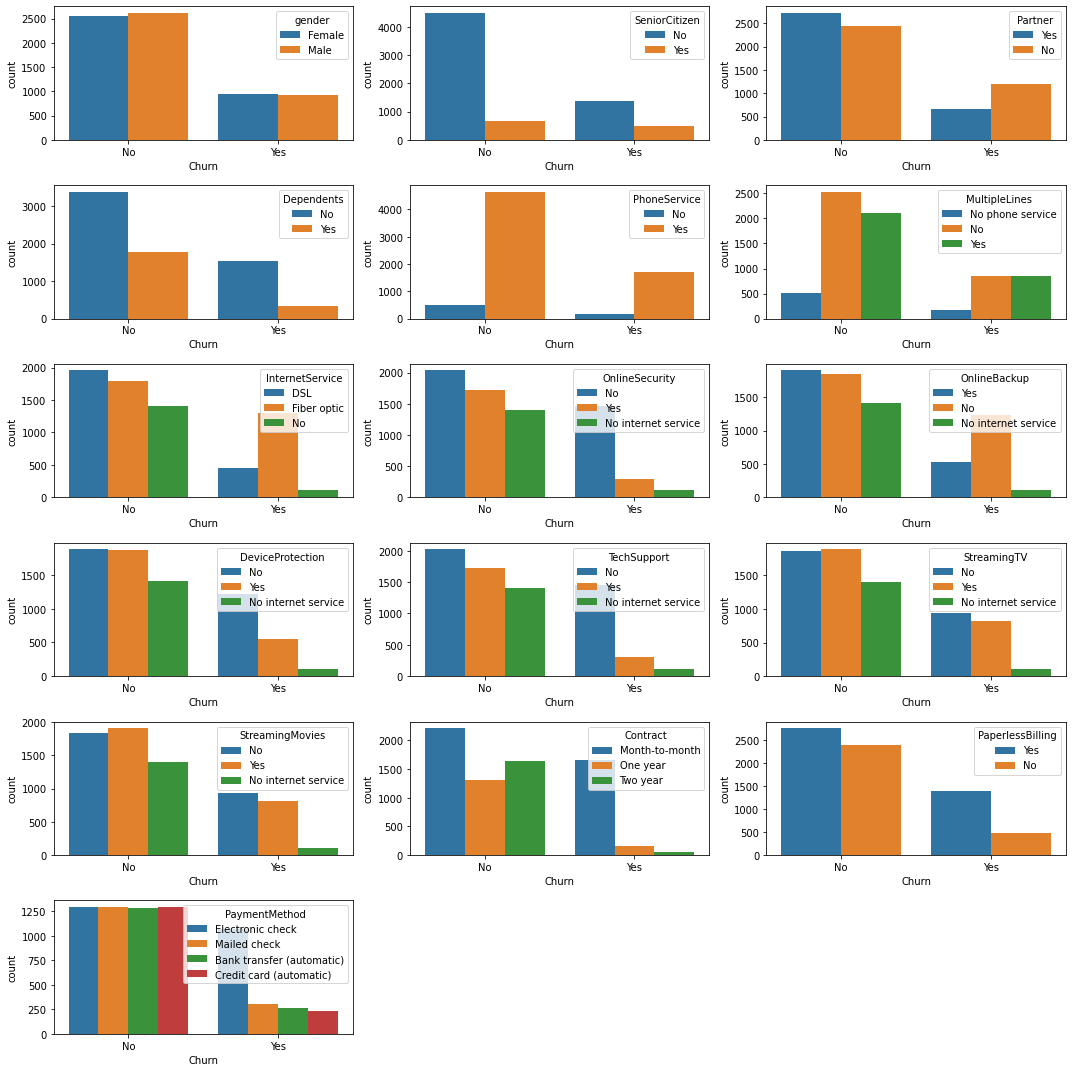

In [21]:
summary_of_categorical_columns(data=data,target_column=target_column,excluded_columns=excluded_columns)

In [22]:
import sys 
sys.path.append('..')
from src.utilities import Utilities

In [23]:
from src.make_dataset import MakeDataset

../params.yaml


In [24]:
def function(*args):
    for arg in args:
        print(arg)

In [25]:
function('grapphs' , 'sub','sum')

grapphs
sub
sum


In [26]:
Utilities().create_folder('graphs','sub')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

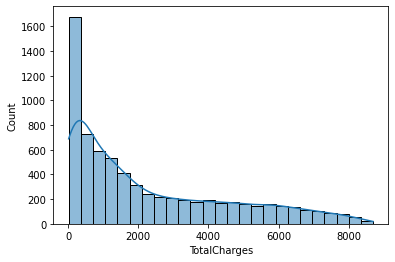

In [27]:
sns.histplot(data = data,x= 'TotalCharges',kde=True)

In [28]:
print(skew(data['TotalCharges']))
print(np.mean(data['TotalCharges']))
print(np.median(data['TotalCharges']))

0.9614373590490068
2283.300440841866
1397.475


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

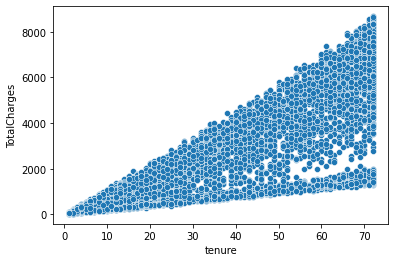

In [29]:
sns.scatterplot(data=data,x='tenure',y= 'TotalCharges')

In [30]:
data[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.00000,0.82588
tenure,0.82588,1.00000


<AxesSubplot:ylabel='MonthlyCharges'>

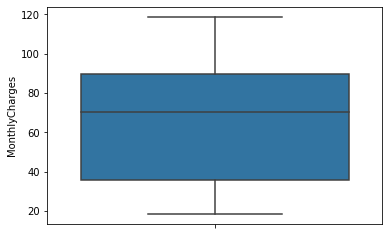

In [31]:
sns.boxplot(data=data,y='MonthlyCharges')

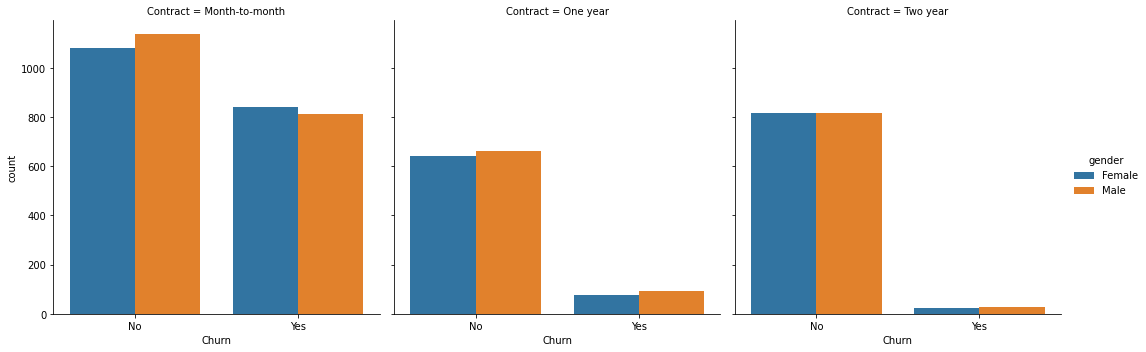

In [32]:
sns.catplot(data=data , x ='Churn',hue='gender',col='Contract',kind='count')

In [33]:
data1 = data[data['Contract'] == 'Month-to-month']

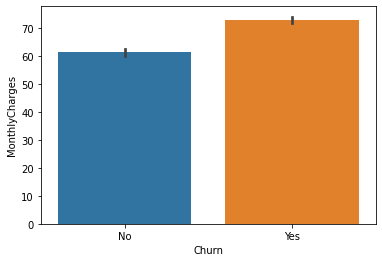

In [34]:
sns.barplot(x='Churn', y='MonthlyCharges', data=data1)
plt.show()


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

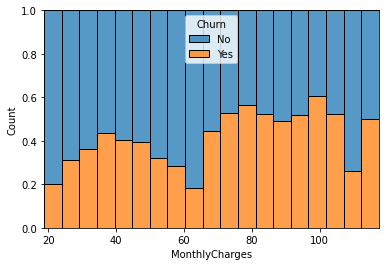

In [35]:
sns.histplot(data=data1,x = 'MonthlyCharges',hue = 'Churn',multiple='fill')

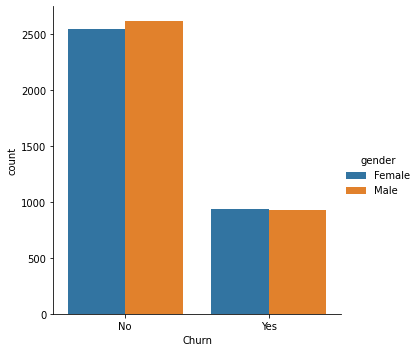

In [36]:
sns.catplot(data = data,x = 'Churn',hue='gender',kind='count')

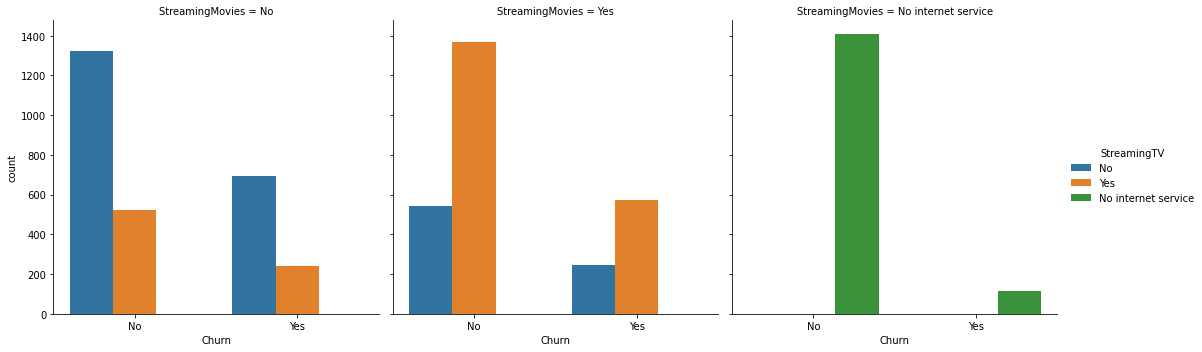

In [37]:
sns.catplot(data = data,x = 'Churn',hue='StreamingTV',kind='count',col='StreamingMovies')

### Overall churn behaviour is more balanced between both genders with slightly higher retention rates in males

## Feature engineering

In [38]:
data[['StreamingTV','StreamingMovies']]

,StreamingTV,StreamingMovies
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
7038,Yes,Yes
7039,Yes,Yes
7040,No,No
7041,No,No


## Data Preparation

In [39]:
X = data.drop(['Churn','customerID'], axis=1)

# We assigned those label values to our Y dataset
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5143,Female,No,Yes,Yes,49,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,87.20,4345.00
3441,Female,No,Yes,Yes,34,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Mailed check,60.80,2042.05
4231,Male,No,No,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),80.60,5708.20
4580,Female,No,Yes,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.10,1372.45
5158,Male,No,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.75,1777.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Female,Yes,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.05,302.60
5604,Male,No,No,No,17,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.80,1207.00
2984,Female,No,Yes,No,26,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,26.00,684.05
2650,Female,No,No,No,15,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.35,1302.65


In [41]:
#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]


cat_cols = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]


num_cols = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()

bin_cols = [i for i in bin_cols if i not in target_col]
multi_cols = [i for i in cat_cols if i not in bin_cols]

# le = LabelEncoder()
# for i in bin_cols :
#     data[i] = le.fit_transform(data[i])
    
# #Duplicating columns for multi value columns
# churn_df = pd.get_dummies(data = data, columns = multi_cols )
# churn_df.head()

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.get_dummies(X, columns=self.columns)

In [43]:
le = LabelEncoder()
ss= StandardScaler()

In [44]:
column_transforming = ColumnTransformer([
    ('binary_cols',OrdinalEncoder(),bin_cols),
    ('multi_cols',OneHotEncoder(),multi_cols),
    ('numeric_cols',StandardScaler(),num_cols)
],remainder='passthrough')

In [45]:
y_test.value_counts()

No     1560
Yes     550
Name: Churn, dtype: int64

In [46]:
X_train_transformed = column_transforming.fit_transform(X_train)

In [47]:
log_reg = LogisticRegression(random_state=123,max_iter=2000)

knn = KNeighborsClassifier()

random_forest = RandomForestClassifier(random_state=456, max_depth=3)

xgboost = XGBClassifier(max_depth=2)

In [48]:
logistic_regression_pipeline = Pipeline([
    ('log_preprocess',column_transforming),
    ('log_model',log_reg)
])

knn_algo_pipeline = Pipeline([
    ('knn_preprocess',column_transforming),
    ('knn_model',knn)
])

random_forest_classifier_pipeline = Pipeline([
    ('random_forest_preprocess',column_transforming),
    ('random_forest_model',random_forest)
])

xgboost_pipe = Pipeline([
    ('xgboost_preprocess',column_transforming),
    ('xgboost_model',xgboost)
])

In [49]:
y_train = [1 if i == 'Yes' else 0 for i in y_train]
y_test = [1 if i == 'Yes' else 0 for i in y_test]


In [50]:
logistic_regression_pipeline.fit(X_train,y_train)
knn_algo_pipeline.fit(X_train,y_train)
random_forest_classifier_pipeline.fit(X_train,y_train)
xgboost_pipe.fit(X_train,y_train)

/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgboost_preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary_cols',
                                                  OrdinalEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('multi_cols', OneHotEncoder(),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                

In [51]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)
cv_score = cross_val_score(xgboost_pipe,X_train,y_train,scoring='accuracy', cv=skf)
print(cv_score)

/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.80730223 0.80730223 0.79674797 0.7804878  0.80691057 0.80081301
 0.79065041 0.80691057 0.77845528 0.81910569]


In [52]:
y_pred_log = logistic_regression_pipeline.predict(X_test)
y_pred_xg = xgboost_pipe.predict(X_test)
y_pred_rfc = random_forest_classifier_pipeline.predict(X_test)
y_pred_knn = knn_algo_pipeline.predict(X_test)

In [53]:
print(classification_report(y_pred=y_pred_log,y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1560
           1       0.60      0.55      0.57       550

    accuracy                           0.79      2110
   macro avg       0.72      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [54]:
print(classification_report(y_pred=y_pred_xg,y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1560
           1       0.62      0.53      0.58       550

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [55]:
print(classification_report(y_pred=y_pred_rfc,y_true=y_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1560
           1       0.68      0.37      0.48       550

    accuracy                           0.79      2110
   macro avg       0.75      0.66      0.68      2110
weighted avg       0.78      0.79      0.77      2110



In [56]:
print(classification_report(y_pred=y_pred_knn,y_true=y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1560
           1       0.53      0.52      0.52       550

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110



In [58]:
param_grid = {
    'xgboost_model__max_depth': [3, 5, 7],
    'xgboost_model__learning_rate': [0.1, 0.01, 0.001],
    'xgboost_model__n_estimators': [100, 200, 300],
    'xgboost_model__gamma': [0, 0.1, 0.2],
    'xgboost_model__subsample': [0.6, 0.8, 1.0]

}

In [59]:
grid_search = GridSearchCV(estimator=xgboost_pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [1]:
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

NameError: name 'grid_search' is not defined

In [83]:
y_pred_xg = xgboost_pipe.predict(X_test)

In [84]:
print(classification_report(y_pred=y_pred_xg,y_true=y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1518
           1       0.69      0.51      0.58       592

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [80]:
print(classification_report(y_pred=y_pred_xg,y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1518
           1       0.68      0.55      0.60       592

    accuracy                           0.80      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [76]:
## 8. Checking the cross validation score for each of the above algorithms
pipelines = [logistic_regression_pipeline, knn_algo_pipeline, random_forest_classifier_pipeline, xgboost_pipe]
classifiers = ['logistic regression classifer', 'KNeighbors classifier', 'Random forest classifier', 'xgboost classifier']

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)

for i in range(len(pipelines)):
    cv_score = cross_val_score(pipelines[i],X_train,y_train,scoring='accuracy', cv=skf)
    print(f"The cross validation score for the {classifiers[i]} based on accuracy score is {np.round(cv_score.mean(),3)} +/= {np.round(cv_score.std(),3)}")

The cross validation score for the logistic regression classifer based on accuracy score is 0.807 +/= 0.011
The cross validation score for the KNeighbors classifier based on accuracy score is 0.774 +/= 0.016
The cross validation score for the Random forest classifier based on accuracy score is 0.786 +/= 0.008
[15:45:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mtr_055/miniconda3/envs/learning/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The cross validation score for the xgboost classifier based on accuracy score is 0.804 +/= 0.012


In [96]:
from joblib import dump

# 'logistic_regression_pipeline' is the pipeline object you want to save
# 'pipeline.joblib' is the filename you want to save it as
dump(logistic_regression_pipeline, '../Models/pipeline.joblib')


['../Models/pipeline.joblib']

In [87]:
test1 = ['Female',1,'No','No',20,'Yes','Yes','Fiber optic','Yes','No','No','No','No','No','Month-to-month','Yes','Electronic check',79.15,1520.90]


In [92]:
columns = X_train.columns
test1 = pd.DataFrame([test1],columns=columns)

In [93]:
test1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,1,No,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1520.9


In [27]:
transformed_data = column_transforming.fit_transform(X=data)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Partner': ['Yes', 'No', 'No', 'Yes'],
    'MonthlyCharges': [65.0, 55.0, 80.0, 75.0],
    'tenure': [12, 24, 6, 36]
})

# Columns to transform
bin_cols = ['Partner']
num_cols = ['MonthlyCharges', 'tenure']

# Initialize transformers
le = LabelEncoder()
ss = StandardScaler()

# Define ColumnTransformer
column_transforming = ColumnTransformer([
    ('binary_cols', le, 'Partner'),
    ('numeric_cols', ss, num_cols)
], remainder='passthrough')

# Fit and transform the dataset
transformed_data = column_transforming.fit_transform(data)

# Display the transformed dataset
print(transformed_data)


TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [35]:
data

,Partner,MonthlyCharges,tenure
0,Yes,65.0,12
1,No,55.0,24
2,No,80.0,6
3,Yes,75.0,36


In [19]:
column_transforming

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary_cols', LabelEncoder(),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService',
                                  'PaperlessBilling']),
                                ('numeric_cols', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

In [20]:
transformed_data = column_transforming.fit_transform(data)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
data

In [ ]:
transformed = column_transforming.fit_transform(data)

In [ ]:
num_cols

In [ ]:
logistic_regression_pipeline = Pipeline([
    ('log_preprocess',column_transforming),
])

In [28]:
X = data.drop(['Churn','customerID'], axis=1).values

# We assigned those label values to our Y dataset
y = data['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

KeyError: "['Churn' 'customerID'] not found in axis"

In [ ]:
X_train

In [ ]:
x_train_transformed = logistic_regression_pipeline.fit_transform(X_train)

In [ ]:
logistic_regression_pipeline = Pipeline([
    ('log_preprocess',column_transforming)
])

In [ ]:
logistic_regression_pipeline(data)